# A DATA ANALYSIS OF TRAFFIC ACCIDENTS IN SEATTLE, WA
### Applied Data Science Capstone for the IBM Data Science Profissional Certificate/Coursera

Author: Marcelo Camera Oliveira


## Table of contents
* [1 - Business Understanding](#intro)
* [2 - The Dataset](#dataset)
* [3 - Methodology](#methodology)
* [4 - Analysis](#analysis)
* [5 - Results and Discussion](#results)
* [6 - Conclusion](#final)

## 1. Business Understanding  <a name="intro"></a>

The increasing number of cars on the roads brings with it a worrying reality: the increase of the accident rate. Such accidents cause enormous consequences, the most important of which, of a human nature, is the loss of life. Other effects appear in the ride of this reality, one of which is the financial loss, due to the long traffic jams and roadblocks, which have a negative impact on the logistics of goods.

In parallel, it is necessary to contextualize the importance of Information and Communication Technology (ICT) in solving urban problems. Given the worldwide technological advancement, cities are becoming increasingly “smart”. The terminology "Smart Cities" basically goes back to the concept of a city that makes use of ICT, through various physical devices connected to the IoT (Internet of Things) network, in order to optimize its operations and services, in addition to connecting citizens.

Faced with such a problem, it is suggested the development of a mathematical model that, in view of the knowledge of initial situations, a risk classification should be carried out. From this perspective, given the driver's entry into a certain road, he is given knowledge of the degree of risk to which he will be subject and, thus, the necessary preventive measures can be taken, such as: changing his route, reducing the car speed, or increasing your attention.

Thus, having the knowledge of historical accident data in a given location and the creation of a mathematical model based on this data, a city could use this tool to implement data capture devices (rain, traffic, object recognition on the roads) with the purpose of issuing alerts to the drivers (electronic boards, mobile phone applications, among others).

This project aims to inform Seattle city drivers (audience) about the conditions of the road he will be joining. In this way, he will be able to analyze the situation in order to take the necessary preventive measures.

## 2. The Dataset <a name="dataset"></a>

To understand the problem, we will use the data indicated by Coursera as data source for this project. This data contains several records of accidents with vehicles in the city of Seattle, USA, from 2004 to the present.

The dataset has 194.673 registers and 38 columns (target variable, features and uninteresting data), but we won't use all of these attributes.

Analyzing the available data dictionary, with focus on the problem, we could see wich features we will really necessary. Are they:

| ATTRIBUTE | DESCRIPTION |
| :---: | :---: |
| `SEVERITYCODE` | Target variable. Severity of the collision (3—fatality, 2b—serious injury, 2—injury, 1—prop damage, 0—unknown); |
| `SEVERITYDESC` | A detailed description of the severity of the collision |
| `X` | Longitude - Geographic coordinate; |
| `Y` | Latitude - Geographic coordinate; |
| `ADDRTYPE` | Collision address type: Alley, Block or Intersection; |
| `COLLISIONTYPE` | Collision type; |
| `PERSONCOUNT` | The total number of people involved in the collision; |
| `PEDCOUNT` | The number of pedestrians involved in the collision; |
| `PEDCYLCOUNT` | The number of bicycles involved in the collision; |
| `VEHCOUNT` | The number of vehicles involved in the collision; |
| `INCDTTM` | The date and time of the incident; |
| `JUNCTIONTYPE` | Category of junction at which collision took place; |
| `INATTENTIONIND` | Whether or not collision was due to inattention; |
| `UNDERINFL` | Whether or not a driver involved was under the influence of drugs or alcohol; |
| `WEATHER` | A description of the weather conditions during the time of the collision; |
| `ROADCOND` | The condition of the road during the collision; |
| `LIGHTCOND` | The light conditions during the collision; |
| `SPEEDING` | Whether or not speeding was a factor in the collision. |

The complete metadata for the data source can be found via [this link.](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf)

## 3. Methodology <a name="methodology"></a>

This is the main section of the project. Here, we will cover and describe the exploratory data analysis, inferential statistical testing and what machine learnings were used and why.

We will use the Cross-Industry Standard Process for Data Mining (CRISP-DM) which consist of the following steps:

1. **Business Understanding:** The initial phase is to understand the project's objective from the business or application perspective. We talked about it in section 1 of this project.

1. **Data understanding:** In this phase, we will download the dataset and filter the attributes (columns) that we will use, as we discused on the section 2.

1. **Data Preparation:** The data preparation includes all the required activities to construct the final dataset which will be fed into the modeling tools. Data preparation includes balancing the labeled data, transformation, filling missing data, and cleaning the dataset.

1. **Modeling:** In this phase, various algorithms and methods will be tested to build the model including supervised machine learning techniques. 

1. **Evaluation:** Before proceeding to the deployment stage, the model needs to be evaluated thoroughly to ensure that the business or the application's objectives are achieved. Certain metrics can be used for the model evaluation such as accuracy, recall, F1-score, precision, and others.

1. **Deployment:** The deployment phase requirements vary from project to project. It can be as simple as creating a report, developing interactive visualization, or making the machine learning model available in the production environment. **This step is out of scope of this project.**

### 3.1 Data Preparation

#### 3.1.1 Importing and loading the data to a dataframe

Let's import the dataset with the attributes chosen on the section 2.

In [181]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [182]:
#Downloading the data
!wget -O collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-11-10 01:22:17--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘collisions.csv’

collisions.csv      100%[===================>]  70.49M  45.6MB/s    in 1.5s    

2020-11-10 01:22:19 (45.6 MB/s) - ‘collisions.csv’ saved [73917638/73917638]



In [196]:
#Loading the data
chosen_attributes = ['SEVERITYCODE','X','Y','ADDRTYPE','SEVERITYDESC','COLLISIONTYPE','PERSONCOUNT',
                     'PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INCDTTM','JUNCTIONTYPE','INATTENTIONIND',
                     'UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','SPEEDING']
collisions = pd.read_csv('collisions.csv', low_memory=False, parse_dates=['INCDTTM'],usecols=chosen_attributes)
collisions.head()

,SEVERITYCODE,X,Y,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,-122.323148,47.703140,Intersection,Injury Collision,Angles,2,0,0,2,2013-03-27 14:54:00,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight,NaN
1,1,-122.347294,47.647172,Block,Property Damage Only Collision,Sideswipe,2,0,0,2,2006-12-20 18:55:00,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On,NaN
2,1,-122.334540,47.607871,Block,Property Damage Only Collision,Parked Car,4,0,0,3,2004-11-18 10:20:00,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,NaN
3,1,-122.334803,47.604803,Block,Property Damage Only Collision,Other,3,0,0,3,2013-03-29 09:26:00,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN
4,2,-122.306426,47.545739,Intersection,Injury Collision,Angles,2,0,0,2,2004-01-28 08:04:00,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,NaN


#### 3.1.2 Cleaning the data

In [197]:
#Checking columns types and data shape
collisions.info()
print("\n The dataset has", collisions.shape[0],"records and", collisions.shape[1], "collumns (target variable and attributes).")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   SEVERITYCODE    194673 non-null  int64         
 1   X               189339 non-null  float64       
 2   Y               189339 non-null  float64       
 3   ADDRTYPE        192747 non-null  object        
 4   SEVERITYDESC    194673 non-null  object        
 5   COLLISIONTYPE   189769 non-null  object        
 6   PERSONCOUNT     194673 non-null  int64         
 7   PEDCOUNT        194673 non-null  int64         
 8   PEDCYLCOUNT     194673 non-null  int64         
 9   VEHCOUNT        194673 non-null  int64         
 10  INCDTTM         194673 non-null  datetime64[ns]
 11  JUNCTIONTYPE    188344 non-null  object        
 12  INATTENTIONIND  29805 non-null   object        
 13  UNDERINFL       189789 non-null  object        
 14  WEATHER         189592 non-null  obj

In [198]:
#Checking how many missing values are there
collisions.isna().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
ADDRTYPE            1926
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDTTM                0
JUNCTIONTYPE        6329
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
SPEEDING          185340
dtype: int64

In [199]:
#There are a lot of data missing. We will delete these records.
#The attributes SPEEDING and INATTENTIONIND has a lot of missing data! We will drop these attributes.

collisions.drop(columns=['SPEEDING','INATTENTIONIND'], inplace=True) #dropping the attributes
collisions.dropna(inplace=True) #Deleting records with missing data
print(collisions.isna().sum())
print("\n The dataset now has", collisions.shape[0],"records and", collisions.shape[1], "collumns (target variable and attributes).")

SEVERITYCODE     0
X                0
Y                0
ADDRTYPE         0
SEVERITYDESC     0
COLLISIONTYPE    0
PERSONCOUNT      0
PEDCOUNT         0
PEDCYLCOUNT      0
VEHCOUNT         0
INCDTTM          0
JUNCTIONTYPE     0
UNDERINFL        0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
dtype: int64

 The dataset now has 180067 records and 16 collumns (target variable and attributes).


No missing data anymore!

In [200]:
#Checking the unique values of some attributes just to see if we have something wrong.
for i in collisions.columns:
    print(i, collisions[i].unique(),'\n')

SEVERITYCODE [2 1] 

X [-122.3231484 -122.3472943 -122.33454   ... -122.3927543 -122.3042172
 -122.3616722] 

Y [47.70314032 47.64717249 47.60787143 ... 47.51527348 47.6695375
 47.55672231] 

ADDRTYPE ['Intersection' 'Block'] 

SEVERITYDESC ['Injury Collision' 'Property Damage Only Collision'] 

COLLISIONTYPE ['Angles' 'Sideswipe' 'Parked Car' 'Other' 'Cycles' 'Rear Ended' 'Head On'
 'Left Turn' 'Pedestrian' 'Right Turn'] 

PERSONCOUNT [ 2  4  3  0  5  1  6 16  8  7 11  9 12 17 26 22 10 37 13 36 28 14 53 19
 30 29 23 44 15 32 21 41 27 20 35 43 81 18 25 48 24 34 57 39 47 54 31] 

PEDCOUNT [0 1 2 3 4 5 6] 

PEDCYLCOUNT [0 1 2] 

VEHCOUNT [ 2  3  1  4  0  7  5  6  8 11  9 10 12] 

INCDTTM ['2013-03-27T14:54:00.000000000' '2006-12-20T18:55:00.000000000'
 '2004-11-18T10:20:00.000000000' ... '2019-01-19T09:25:00.000000000'
 '2019-01-15T16:48:00.000000000' '2018-11-30T15:45:00.000000000'] 

JUNCTIONTYPE ['At Intersection (intersection related)'
 'Mid-Block (not related to intersection)' 'Driv

In [201]:
collisions['LIGHTCOND'].value_counts()

Daylight                    112216
Dark - Street Lights On      46683
Unknown                      10340
Dusk                          5708
Dawn                          2389
Dark - No Street Lights       1418
Dark - Street Lights Off      1130
Other                          172
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [202]:
#Some attributes have values like "Unknown" or "Other" that do not help us. We will delete records that contain these values.
collisions = collisions.drop(collisions[(collisions['COLLISIONTYPE'] == "Other") | 
                                        (collisions['JUNCTIONTYPE'] == "Unknown") | 
                                        (collisions['WEATHER'] == "Other") | 
                                        (collisions['WEATHER'] == "Unknown") |
                                        (collisions['ROADCOND'] == "Other") | 
                                        (collisions['ROADCOND'] == "Unknown") |
                                        (collisions['LIGHTCOND'] == "Other") |
                                        (collisions['LIGHTCOND'] == "Unknown")].index)

#Fixing the attribute UNDERINFL for use only zeros and ones.

collisions['UNDERINFL'].replace("N","0",inplace=True)
collisions['UNDERINFL'].replace("Y","1",inplace=True)
collisions['UNDERINFL'] = collisions['UNDERINFL'].astype('int') #changing the attribute type for integer

#The information bellow is the same. Let's join then.
collisions['LIGHTCOND'] = collisions['LIGHTCOND'].replace("Dark - Street Lights Off", "Dark - No Street Lights")

#Dropping the 'Dark - Unknown Lighting' in attribute 'LIGHTCOND'. There are only a few records and this information doesnt help so much.
collisions = collisions.drop(collisions[(collisions['LIGHTCOND'] == "Dark - Unknown Lighting")].index)

for i in collisions.columns:
    print(i, collisions[i].unique(),'\n')

print("\n The dataset now has", collisions.shape[0],"records and", collisions.shape[1], "collumns (target variable and attributes).")

SEVERITYCODE [2 1] 

X [-122.3231484 -122.3472943 -122.33454   ... -122.3272738 -122.3283544
 -122.3042172] 

Y [47.70314032 47.64717249 47.60787143 ... 47.54386061 47.55303692
 47.6695375 ] 

ADDRTYPE ['Intersection' 'Block'] 

SEVERITYDESC ['Injury Collision' 'Property Damage Only Collision'] 

COLLISIONTYPE ['Angles' 'Sideswipe' 'Parked Car' 'Cycles' 'Rear Ended' 'Head On'
 'Left Turn' 'Pedestrian' 'Right Turn'] 

PERSONCOUNT [ 2  4  3  0  5  6 16  8  7  1 11  9 12 17 26 22 10 37 13 36 28 14 53 19
 29 23 44 15 32 21 41 27 20 35 43 30 18 24 34 39 47 54 25 31] 

PEDCOUNT [0 1 2 3 4 6] 

PEDCYLCOUNT [0 1 2] 

VEHCOUNT [ 2  3  1  4  7  5  0  6  8 11  9 10 12] 

INCDTTM ['2013-03-27T14:54:00.000000000' '2006-12-20T18:55:00.000000000'
 '2004-11-18T10:20:00.000000000' ... '2019-01-19T09:25:00.000000000'
 '2019-01-15T16:48:00.000000000' '2018-11-30T15:45:00.000000000'] 

JUNCTIONTYPE ['At Intersection (intersection related)'
 'Mid-Block (not related to intersection)' 'Driveway Junction'
 'A

#### 3.1.3 Balancing the data

Our target variable is the attribute "SEVERITYCODE", which indicates the severity of the accident.  
In this datase we only have 2 types of severity: 1 - Property Damage Only Collision, 2 - Injury Collision.  
It's important to say that the attribute SEVERITYCODE is the same as the SEVERITYDESC. The only difference is that one is in numbers and the other is in categorical values.

Property Damage Only Collision    94818
Injury Collision                  48923
Name: SEVERITYDESC, dtype: int64

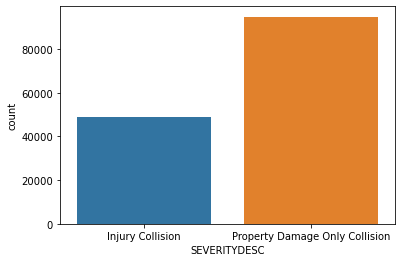

In [203]:
#Checking if the data is balanced
sns.countplot(x="SEVERITYDESC", data=collisions)
collisions['SEVERITYDESC'].value_counts()

As we could see above, there are twice as much "Property Damage Only Collision" data as "Injury Collision" data.  
This will causes a bias in the data results. So, we will need to equalize this data.

In [171]:
#You should have to install the Imballanced library before.
!pip install -U imbalanced-learn

     |████████████████████████████████| 167 kB 10.2 MB/s eta 0:00:01


Injury Collision                  48923
Property Damage Only Collision    48923
Name: SEVERITYDESC, dtype: int64

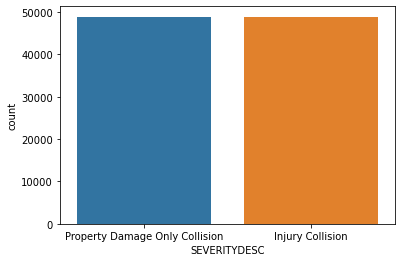

In [204]:
from imblearn.under_sampling import RandomUnderSampler

X = collisions[['X','Y','ADDRTYPE','SEVERITYDESC','COLLISIONTYPE','PERSONCOUNT',
                'PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INCDTTM','JUNCTIONTYPE',
                'UNDERINFL','WEATHER','ROADCOND','LIGHTCOND']]
y = collisions[['SEVERITYCODE']]
rus = RandomUnderSampler(random_state=0)
X_res, y_res = rus.fit_resample(X,y)

collisions = X_res
collisions['SEVERITYCODE'] = y_res

sns.countplot(x="SEVERITYDESC", data=collisions)
collisions['SEVERITYDESC'].value_counts()

Now the data is balanced and we can continue to the next step.

## 4 - Analysis <a name="analysis"></a>

In [16]:
# [WORKING IN PROGRESS]
# perform some basic explanatory data analysis and derive some additional info from our raw data.

## 5 - Results and Discussion <a name="results"></a>

In [17]:
# [WORKING IN PROGRESS]
# Results -> section where you discuss the results.
# Discussion -> section where you discuss any observations you noted and any recommendations you can make based on the results.

## 6 - Conclusion <a name="final"></a>

In [18]:
# [WORKING IN PROGRESS]
# section where you conclude the report

In [1]:
import pandas as pd

!wget -O collisions.csv https://dados.antt.gov.br/dataset/ef0171a8-f0df-4817-a4ed-b4ff94d87194/resource/5011a91e-aff9-4a73-8d8e-3097a2ce063d/download/demostrativo_acidentes.csv

--2020-10-13 19:57:02--  https://dados.antt.gov.br/dataset/ef0171a8-f0df-4817-a4ed-b4ff94d87194/resource/5011a91e-aff9-4a73-8d8e-3097a2ce063d/download/demostrativo_acidentes.csv
Resolving dados.antt.gov.br (dados.antt.gov.br)... 200.198.195.143
Connecting to dados.antt.gov.br (dados.antt.gov.br)|200.198.195.143|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63408368 (60M) [text/csv]
Saving to: ‘collisions.csv’

100%[======================================>] 63,408,368   489KB/s   in 2m 5s  

2020-10-13 19:59:08 (496 KB/s) - ‘collisions.csv’ saved [63408368/63408368]



In [2]:
collisions = pd.read_csv('collisions.csv')
collisions.info()

ParserError: Error tokenizing data. C error: Expected 1 fields in line 15, saw 2
